# Unmyelinated neuron fiber model

## Objectives
- Create unmyelinated neuron fiber model based on myelinated case.
- Check simulated treshold current convergence dependence on the node length

## Rationale
To move from the myelinated case to unmyelinated case the main assumption we made in the model is that now the internodal length will be equal to 0. That is how we make sure that there is no myelin sheat included in the model. For a given fiber length there might be a different number of nodes. This will affect the treshold current needed to elicit action potential. If the node length is too big, the action potential does not propagate. If the node length is too small, the computation time of the simulations rises drastically. That is why it is needed to find a node length treshold. For these purposes, the node length when the treshold current value converges is found. Thus, twith the following increase in the number of nodes the stimulation results will be the same.

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PySONIC.neurons import getPointNeuron
from PySONIC.utils import logger, si_format
from ExSONIC.core import IinjUnmyelinatedSennFiber, IntracellularCurrent
from ExSONIC.test import TestFiber

Let's define the model parameters:

In [2]:
# Fiber model parameters
pneuron = getPointNeuron('FH')       # mammalian fiber membrane equations
fiberD = 10e-6                       # fiber diameter (m)
rho_a = 54.7                         # axoplasm resistivity (Ohm.cm)
d_ratio = 0.6                        # axon / fiber diameter ratio
fiberL = 1e-2                       # fiber length (m) 

# Intracellular stimulation parameters
tstim = 10e-6   # s
toffset = 3e-2  # s
PRF = 100.      # Hz
DC = 1.         # -

Create an intracellular current (stimulation of the first node):

In [3]:
psource = IntracellularCurrent(0, mode='anode')

Run the convergence detection function:

In [4]:
#Supress default INFO logging
import logging, sys
logging.disable(sys.maxsize)

In [5]:
os.chdir('../tests')
from test_senn_unmyelinated import convergence

In [6]:
nnodes = np.logspace(0, 4, 100)
nnodes = np.asarray(np.ceil(nnodes) // 2 * 2 + 1, dtype=int)
Ithrs = convergence(pneuron, fiberD, rho_a, d_ratio, fiberL, tstim, toffset, PRF, DC, psource, nnodes)

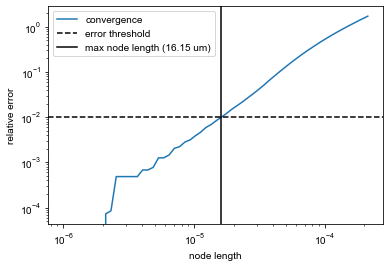

In [7]:
nodeL = fiberL / nnodes
Ithr_ref = Ithrs[-1]
rel_errors = (Ithrs - Ithr_ref) / Ithr_ref
max_rel_error = 0.01
max_nodeL = np.interp(max_rel_error, rel_errors[::-1], nodeL[::-1], left=np.nan, right=np.nan)

#PLotting
fig = plt.plot(nodeL, rel_errors, label='convergence')
plt.xlabel('node length')
plt.ylabel('relative error')
plt.xscale('log')
plt.yscale('log')
plt.axhline(max_rel_error, label='error threshold', color='k', linestyle='--')
plt.axvline(max_nodeL, label=f'max node length ({max_nodeL * 1e6:.2f} um)', color='k')
plt.legend()

The treshold current convergence is shown on the graph above. The relative error (the difference of the treshold current value to the convergence value in percent) rises with the node length. This behaviour is expected as with the rise of the node length it is harder for action potential to propagate. The maximum relative error used here is 1% (shown as a dashed line in the graph). The maximal node length is 16.15 ${\mu}m$, which leads to the aprroximately 1 min computation time per simulation. 

## Conclusions
- The unmyelinated neuron fiber model is created.
- The maximal node length needed for the simulations is found.